# 0) Loading Data

In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io.arff import loadarff
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

warnings.simplefilter("ignore", category=FutureWarning)


#Reading the ARFF file and normalizing it's data
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

scaler = MinMaxScaler()
X = np.array(df.drop('class', axis=1))
y = np.array(df['class'])
print(X[:, 1])

X = scaler.fit_transform(X, y)

[22.55258597 10.06099147 22.21848205 24.65287791  9.65207488 13.92190658
 15.86433612 10.75561143 13.5337531   5.01088412 13.04097405 17.71581923
 19.96455616 20.46082824 24.1888846  12.53799164 20.36250706  3.14466948
 13.44474904 12.25407408 14.17795853 21.06233245 24.41380271 13.06959759
 22.75875277 26.65048856 10.75945357 16.5088837  21.93114655 24.89199889
 15.40221253 11.07904664 17.44383762 12.98644139 31.99824445  7.82622134
  6.98937808 19.44325311 28.84744756 19.01156052 11.7016723   8.39503589
 19.23064334 26.32784484 16.2979149  23.01516931 22.22778399 16.57736351
 17.97778407 17.89940172 20.44011836 41.55733141 29.76012218 11.91744524
 17.32120599 13.27738491  7.46746896 15.35151393 19.66314572 14.93072472
 32.05310438 32.70443487  9.43323421 21.38064464 21.93618556 41.28630543
 22.1817978  19.33979889 18.94617604 -0.26149905 17.38519079 32.9281677
 33.02117462 20.09515673 23.07771056 39.82272448 36.04301632  7.66704419
 17.44279712 12.08935067 30.46999418 21.12240192 29.

## Exercise 1)

In [13]:
KMeans3_labels = []
KMeans3_centroids = []

def purity_score(y_true, labels):
    cluster_scores = {}
    purity = 0
    for index, closest_cluster in enumerate(labels):
        correct_out = y_true[index]
        if closest_cluster not in cluster_scores:
            cluster_scores[closest_cluster] = {}
            if correct_out not in cluster_scores[closest_cluster]:
                cluster_scores[closest_cluster][correct_out] = 1
            else:
                cluster_scores[closest_cluster][correct_out] += 1
        else:
            if correct_out not in cluster_scores[closest_cluster]:
                cluster_scores[closest_cluster][correct_out] = 1
            else:
                cluster_scores[closest_cluster][correct_out] += 1
    for cluster_score in cluster_scores.values():
        purity += max(cluster_score.values())
    purity = purity / len(y_true)

    return purity

for k in (2, 3, 4, 5):
    KMeansCluster = KMeans(n_clusters=k, random_state=0)
    KMeansCluster.fit(X)
    labels = KMeansCluster.predict(X)
    if k == 3:
        KMeans3_labels = labels
        KMeans3_centroids = KMeansCluster.cluster_centers_
    silhouette = silhouette_score(X, labels)
    purity = purity_score(y, labels)
    print(f"For a value of K = {k}:\n\tSilhouette value: {silhouette}\n\tPurity value: {purity}")

For a value of K = 2:
	Silhouette value: 0.36044124340441114
	Purity value: 0.632258064516129
For a value of K = 3:
	Silhouette value: 0.29579055730002257
	Purity value: 0.667741935483871
For a value of K = 4:
	Silhouette value: 0.27442402122340176
	Purity value: 0.6612903225806451
For a value of K = 5:
	Silhouette value: 0.23823928397844843
	Purity value: 0.6774193548387096


From what we can see, as we increase the number of clusters in our Kmeans algorithm, the silhouette value decreases and the purity value increases. This means that a higher number of clusters reflects in a better discriminative power of each cluster, but also that each observations doesn't match as well with the ones inside the same cluster.

## Exercise 2)

### i)

In [14]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
variance = pca.explained_variance_ratio_

print(f"Variance for the first component: {variance[0] * 100}%\nVariance for the second component: {variance[1] * 100}%")
print(f"Total variability explained by the top two principal components: {round(sum(variance), 4) * 100}%")

Variance for the first component: 56.18144484299212%
Variance for the second component: 20.955952591361886%
Total variability explained by the top two principal components: 77.14%


### ii)

In [15]:
components = pca.components_

variables = np.array(df.columns.drop('class'))

component1 = list(zip(variables, np.abs(components[0])))
component2 = list(zip(variables, np.abs(components[1])))

component1_sorted = [x for x, _ in sorted(component1, key=lambda x: x[1], reverse=True)]
component2_sorted = [x for x, _ in sorted(component2, key=lambda x: x[1], reverse=True)]

print(f"Component 1 sorted: {component1_sorted}\nComponent 2 sorted: {component2_sorted}")


Component 1 sorted: ['pelvic_incidence', 'lumbar_lordosis_angle', 'pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis', 'pelvic_radius']
Component 2 sorted: ['pelvic_tilt', 'pelvic_radius', 'sacral_slope', 'pelvic_incidence', 'lumbar_lordosis_angle', 'degree_spondylolisthesis']


## Exercise 3)

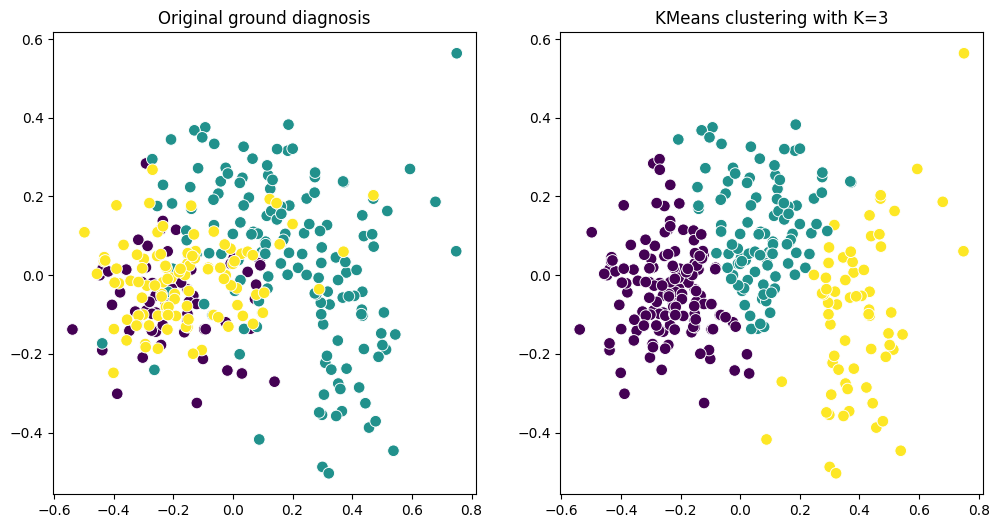

In [16]:
# This is just so that both the original ground diagnosis and the KMneas clustering plots have the same coloring
new_y = []
for output in y:
    match output:
        case "Hernia":
            new_y.append(0)
        case "Spondylolisthesis":
            new_y.append(1)
        case "Normal":
            new_y.append(2)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original ground diagnosis")
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], c=new_y, s=70)
plt.subplot(122)
plt.title("KMeans clustering with K=3")
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], c=KMeans3_labels, s=70)
plt.show()

## Exercise 4)

- Since clustering in it's core is an algorithm that discriminates data, it is pretty obvious that it can be used to characterize a population of ill and healthy individuals especially if under a supervised environment, in which a cluster can represent the ill part of the population and another cluster the healthy part, for example.
- Clustering also helps to more easily find the input parameters that are related, which then, confronted by their respective output, can help determine which attributes characterize both the ill and the healthy population.